In [1]:
#This step focuses on understanding the problem, objects, constraints and expected outcomes
#Buisness Problem: Predict credit risk using financial features from the credit score dataset to identify individuals who are likely to default on loans
#Goal: Build a supervised classification model that accurately predicts whether a customer will default (1) or not default (0) based on their financial and demographic features
#Usefulness: Enables banks and lending institutions to identify high-risk individuals, optimise credit allocation, reduce financial losses and improve overall decision-making transparency. This helps lenders make informed, data-driven decisions to minimise financial risk.
#Task type: Supervised learning for binary classification (default vs non-default)

Step 2 - Data Understanding

In [2]:
#In this step, you explore the dataset, check structure, inspect missing values and gain initial insights

In [3]:
#Import libraries
#Import pandas for loading and exploring tabular data
import pandas as pd

#Import numpy for basic numerical operations
import numpy as np

#Import matplotlib for plotting
import matplotlib.pyplot as plt

#Import seaborn for statistical visualisations
import seaborn as sns

#Enable inline plotting so figures appear in the notebook
%matplotlib inline

In [4]:
#Load the credit score dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('credit_score.csv')

#Show the first 5 rows to get an initial look at the data
print("First 5 rows of the dataset:")
print(df.head())

#Display information about columns, data types, and non-null counts
print("\nDescriptive statistics")
print(df.describe())

#Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows of the dataset:
      CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0  C02COQEVYU   33269        0   532304            0.0000        16.0000   
1  C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2  C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3  C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4  C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0          1.2000           1889           945      0.5003  ...   
1          3.4615           5818           111      0.0191  ...   
2         24.7142           1157           860      0.7433  ...   
3          9.7499           6857          3686      0.5376  ...   
4          2.0465           1978           322      0.1628  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 0.0000              0

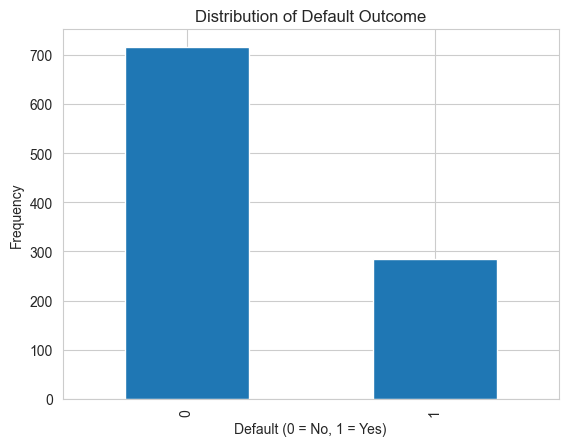

In [6]:
#Plot bar chart of target variable
df["DEFAULT"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.title("Distribution of Default Outcome")
plt.show()

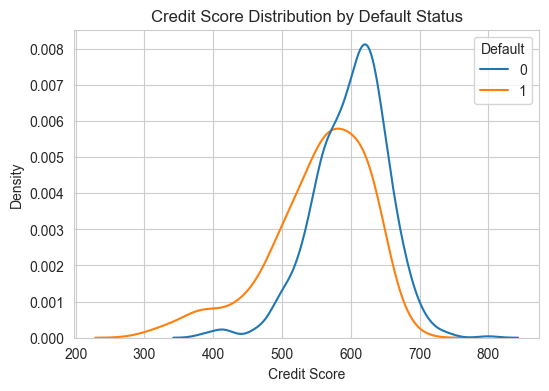

In [17]:
#KDE plot of credit score
plt.figure(figsize=(6,4))
ax = sns.kdeplot(data=df, x="CREDIT_SCORE", hue="DEFAULT", common_norm=False)

legend = ax.get_legend()
legend.set_title("Default")

plt.title("Credit Score Distribution by Default Status")
plt.xlabel("Credit Score")
plt.show()

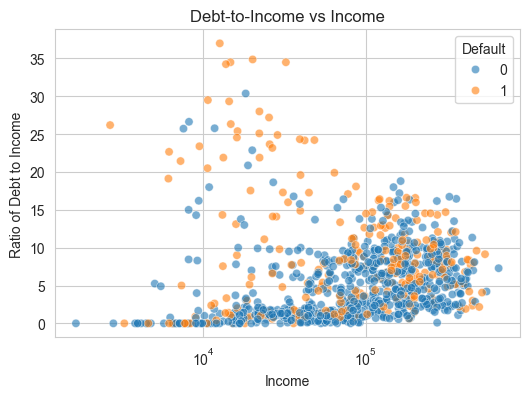

In [36]:
#Scatterplot to look at debt ratio vs income
plt.figure(figsize=(6,4))
ax = sns.scatterplot(
    data=df,
    x="INCOME",
    y="R_DEBT_INCOME",
    hue="DEFAULT",
    alpha=0.6,
)
legend = ax.get_legend()
legend.set_title("Default")

plt.xscale("log")
plt.title("Debt-to-Income vs Income")
plt.ylabel("Ratio of Debt to Income")
plt.xlabel("Income")
plt.show()

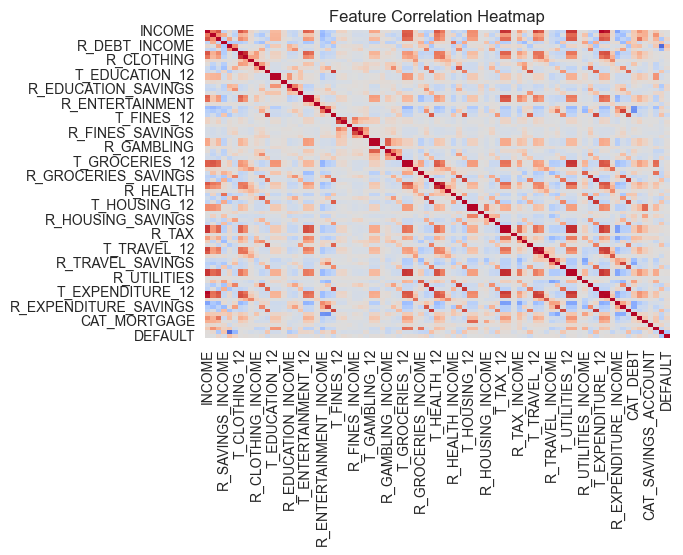

In [21]:
#correlation heatmap
numeric_cols = df.select_dtypes(include='number').columns

corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr,cmap='coolwarm', center=0, cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()

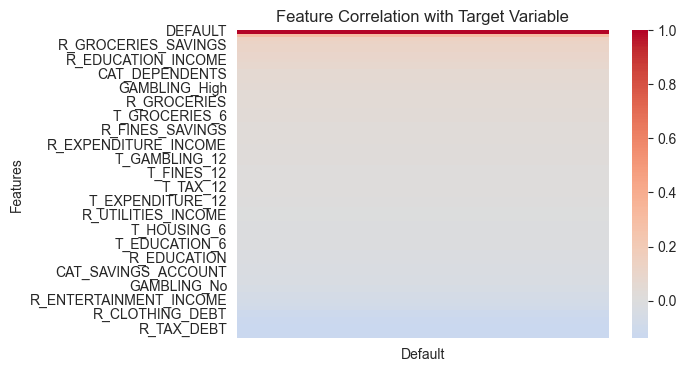

In [32]:
#Compute full correlation of all features with the target
corr_with_target = df.corr()['DEFAULT'].sort_values(ascending=False)

#Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_with_target.to_frame().rename(columns={'DEFAULT':'Default'}),
    cmap='coolwarm',
    center=0,
    annot=False
)

plt.title("Feature Correlation with Target Variable")
plt.ylabel("Features")
plt.show()

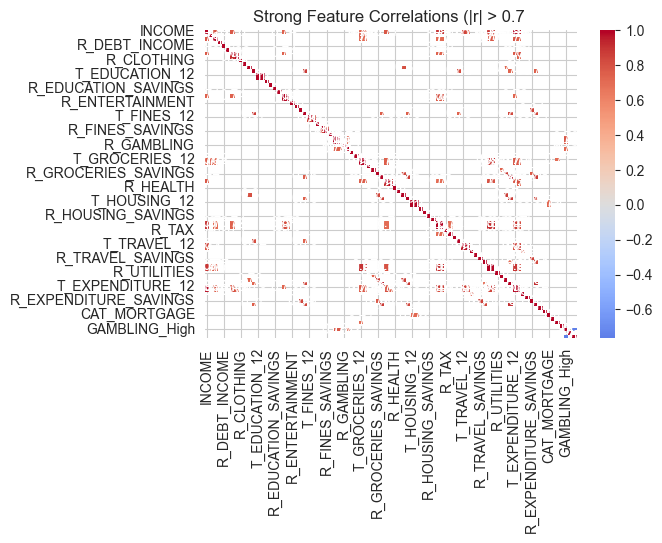

In [26]:
#Compute full correlation matrix
corr_matrix = df.corr()

#Keep only strong correlations
threshold = 0.7
strong_corr = corr_matrix.where(abs(corr_matrix) > threshold)

#Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    strong_corr,
    cmap='coolwarm',
    center=0,
    annot=True,
)

plt.title("Strong Feature Correlations (|r| > 0.7 ")
plt.show()

Step 3 - Data Preparation

In [24]:
#drop customer id (CUST_ID) as it is an identifier and credit score (CREDIT_SCORE) as it's a target variable that could leak information if you're predicting DEFAULT
df = df.drop(columns=['CUST_ID', 'CREDIT_SCORE'])

#Now view the column names in the dataset
print("\nColumns:")
print(df.columns)


Columns:
Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R

In [26]:
#One-hot encode CAT_GAMBLING
df = pd.get_dummies(df, columns=['CAT_GAMBLING'], prefix='GAMBLING')

In [27]:
#Separate features (independent variables) and target (dependent variable)
#Drop the 'DEFAULT' column (target)
#Feature matrix without target
X = df.drop(["DEFAULT"], axis=1)
#Target vector is DEFAULT
y = df["DEFAULT"]

#Import train_test_split to split data into training and test sets
from sklearn.model_selection import train_test_split

#Split the dataset into training and test sets
#Use 20% of samples for testing by doing test_size=0.2
#random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting arrays to confirm the split
print("\nShape of X_train.shape:", X_train.shape)
print("\nShape of X_test.shape:", X_test.shape)
print("\nShape of y_train.shape:", y_train.shape)
print("\nShape of y_test.shape:", y_test.shape)

#Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

#Create an instance of the scaler
scaler = StandardScaler()

#Fit the scaler on the training feature data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Use the fitted scaler to transform the test feature data
X_test_scaled = scaler.transform(X_test)

#Print a message to confirm that scaling is done
print("\nFeature scaling completed.")



Shape of X_train.shape: (800, 86)

Shape of X_test.shape: (200, 86)

Shape of y_train.shape: (800,)

Shape of y_test.shape: (200,)

Feature scaling completed.


Step 4 - Modelling

In [33]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Create Logistic Regression model
#Initalise Logistic Regression
log_reg = LogisticRegression(max_iter=200, class_weight="balanced")

#Train Logistic Regression
#Fit model
log_reg.fit(X_train_scaled, y_train)

#Create Random Forest Classifier
#Initialise Random Forest
rf_class = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

#Train Random Forest model
#Fit Random Forest
rf_class.fit(X_train, y_train)

print("Logistic Regression and Random Forest models trained successfully.")

Logistic Regression and Random Forest models trained successfully.


Step 5 - Evaluation

Logistic Regression Accuracy: 0.570
Random Forest Accuracy:       0.695

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       146
           1       0.34      0.61      0.43        54

    accuracy                           0.57       200
   macro avg       0.57      0.58      0.54       200
weighted avg       0.67      0.57      0.59       200

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       146
           1       0.32      0.11      0.16        54

    accuracy                           0.69       200
   macro avg       0.53      0.51      0.49       200
weighted avg       0.62      0.69      0.64       200



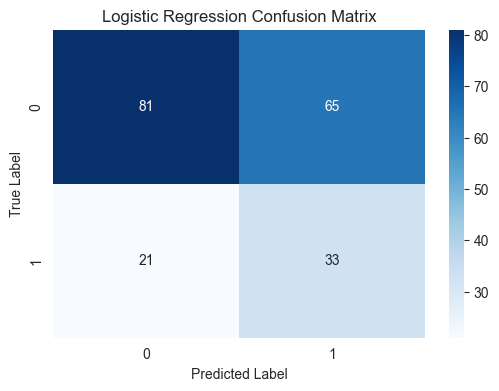

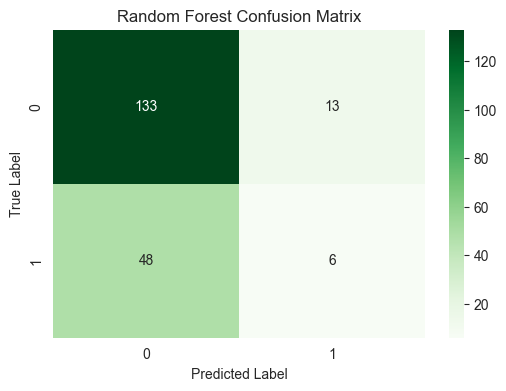

In [34]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#-------------------------------
#Predictions for each model
#-------------------------------

#Predict using Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)

#Predict using Random Forest Classifier
y_pred_rf = rf_class.predict(X_test)

#-------------------------------
#Accuracy scores
#-------------------------------
#Accuracy for Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)

#Accuracy for Random Forest Classifier
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Random Forest Accuracy:       {acc_rf:.3f}")

#-------------------------------
#Classification Reports
#-------------------------------
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#-------------------------------
#Confusion Matrices
#-------------------------------

#Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)

#Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

#-------------------------------
#Plot Confusion Matrix for  Logistic Regression
#-------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#-------------------------------
#Plot Confusion Matrix for Random Forest
#-------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
#Import roc_auc evaluation metric
from sklearn.metrics import roc_auc_score

#Predict probability for logistic regression
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

#ROC-AUC scores for logistic regression
auc_log = roc_auc_score(y_test, y_prob_log)

#Predict probability for random forest
y_prob_rf = rf_class.predict_proba(X_test)[:, 1]

#ROC-AUC scores for random forest
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Logistic Regression ROC-AUC:   {auc_log:.3f}")
print(f"Random Forest ROC-AUC:          {auc_rf:.3f}")

Logistic Regression ROC-AUC:   0.644
Random Forest ROC-AUC:          0.601
